In [193]:
import os
import warnings
import tensorflow as tf
from builder.set_builder import SetBuilder
import matplotlib.pyplot as plt
import utils.df_util as df_util
import numpy as np

tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [181]:
builder = SetBuilder('../res/slice/', sliding=200)
builder.build_debug()

In [182]:
arr = builder.random_data_arr(size=20000, normalized=True)

正在生成数据集...
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
资源已经用尽
数据集生成完毕，耗时35 s


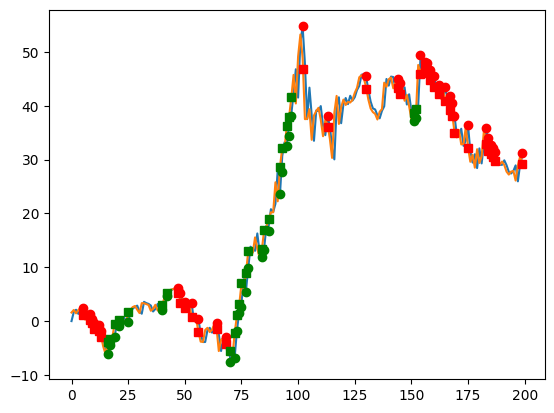

         close       high        low       open  volume  mark
0     1.588785   1.615122  -1.002472   0.000000       0     0
1     2.067340   2.218255   1.258499   1.680497       0     0
2     1.435052   2.457086   1.208814   2.109099       0     0
3     2.062759   2.063726   0.899672   1.340608       0     0
4     2.402024   2.915821   1.943730   2.187680       0     0
..         ...        ...        ...        ...     ...   ...
195  27.879063  28.103892  26.570352  27.880203       0     0
196  26.097959  29.470128  25.871463  28.918723       0     0
197  28.870533  28.875641  25.749004  25.956390       0     0
198  30.602737  31.979641  28.137370  29.196323       0     0
199  29.371113  31.258716  29.183805  30.831879       0     2

[200 rows x 6 columns]


In [131]:
s = arr[236]
plt.plot(s['open'])
plt.plot(s['close'])
# plt.plot(s['rate_volume'])

for index, row in s.iterrows():
    if row['mark'] == 1:
        plt.plot(index, row['high'], 'gs')
        plt.plot(index, row['low'], 'go')
    if row['mark'] == 2:
        plt.plot(index, row['low'], 'rs')
        plt.plot(index, row['high'], 'ro')
plt.show()
print(s)

In [166]:
y = [df.tail(1)['mark'].values[0] for df in arr[0:8000]]
x = [[i for ar in df[['close', 'high', 'low', 'open']].values for i in ar] for df in arr[0:8000]]
x_2 = [df[['close', 'high', 'low', 'open']].values for df in arr[0:8000]]
v_y = [df.tail(1)['mark'].values[0] for df in arr[8000:10000]]
v_x = [[i for ar in df[['close', 'high', 'low', 'open']].values for i in ar] for df in arr[8000:10000]]
v_x_2 = [df[['close', 'high', 'low', 'open']].values for df in arr[8000:10000]]
y = list(map(lambda item: 0 if item == 2 else item, y))
v_y = list(map(lambda item: 0 if item == 2 else item, v_y))

In [185]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 4, input_shape=(200, 4)),
    tf.keras.layers.MaxPool1D(2),

    tf.keras.layers.Conv1D(64, 4),
    tf.keras.layers.MaxPool1D(2),

    tf.keras.layers.Conv1D(128, 4),
    tf.keras.layers.MaxPool1D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.build()
model.summary()
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['acc'])

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_38 (Conv1D)          (None, 197, 32)           544       
                                                                 
 max_pooling1d_37 (MaxPoolin  (None, 98, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_39 (Conv1D)          (None, 95, 64)            8256      
                                                                 
 max_pooling1d_38 (MaxPoolin  (None, 47, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_40 (Conv1D)          (None, 44, 128)           32896     
                                                                 
 max_pooling1d_39 (MaxPoolin  (None, 22, 128)        

In [186]:
his = model.fit(np.asarray(x_2), np.asarray(y), epochs=10)

Epoch 1/10
250/250 [==============================] - 7s 24ms/step - loss: 1.1711 - acc: 0.5169
Epoch 2/10
250/250 [==============================] - 6s 24ms/step - loss: 0.7468 - acc: 0.5494
Epoch 3/10
250/250 [==============================] - 6s 24ms/step - loss: 0.7110 - acc: 0.5610
Epoch 4/10
250/250 [==============================] - 6s 24ms/step - loss: 0.6802 - acc: 0.5891
Epoch 5/10
250/250 [==============================] - 6s 24ms/step - loss: 0.6617 - acc: 0.6151
Epoch 6/10
250/250 [==============================] - 6s 23ms/step - loss: 0.6499 - acc: 0.6255
Epoch 7/10
250/250 [==============================] - 6s 24ms/step - loss: 0.6292 - acc: 0.6478
Epoch 8/10
250/250 [==============================] - 6s 24ms/step - loss: 0.6140 - acc: 0.6621
Epoch 9/10
250/250 [==============================] - 6s 24ms/step - loss: 0.5898 - acc: 0.6914
Epoch 10/10
250/250 [==============================] - 6s 25ms/step - loss: 0.5719 - acc: 0.7088


In [188]:
model.evaluate(np.asarray(v_x_2), np.asarray(v_y))

63/63 [==============================] - 0s 6ms/step - loss: 0.6952 - acc: 0.6040


[0.6952250599861145, 0.6039999723434448]

In [72]:
arr[0][['close', 'high', 'low', 'open']].values[0:2]

array([[ -1.89542456,   0.        ,  -3.39869576,   0.        ],
       [ -8.10457357,  -6.209149  , -11.83006795,  -9.73856047]])

In [195]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [196]:
tf.__version__

'2.12.0'